In [1]:
import pandas as pd
import numpy as np

# Dataset

In [2]:
df = pd.read_csv(r"C:/Users/Divya/Downloads/Mobiles Dataset (2025).csv",encoding="ISO-8859-1")
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [4]:
df.describe

<bound method NDFrame.describe of     Company Name            Model Name Mobile Weight   RAM     Front Camera  \
0          Apple       iPhone 16 128GB          174g   6GB             12MP   
1          Apple       iPhone 16 256GB          174g   6GB             12MP   
2          Apple       iPhone 16 512GB          174g   6GB             12MP   
3          Apple  iPhone 16 Plus 128GB          203g   6GB             12MP   
4          Apple  iPhone 16 Plus 256GB          203g   6GB             12MP   
..           ...                   ...           ...   ...              ...   
925         Poco          Pad 5G 128GB          571g   8GB              8MP   
926         Poco          Pad 5G 256GB          571g   8GB              8MP   
927      Samsung  Galaxy Z Fold6 256GB          239g  12GB  10MP, 4MP (UDC)   
928      Samsung  Galaxy Z Fold6 512GB          239g  12GB  10MP, 4MP (UDC)   
929      Samsung    Galaxy Z Fold6 1TB          239g  12GB  10MP, 4MP (UDC)   

    Back Camera  

In [5]:
df.shape

(930, 15)

# Data Cleaning

In [6]:
df.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [7]:
df.duplicated().sum()

15

In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Handle missing values by filling with appropriate strategies
df_cleaned = df_cleaned.fillna(method='ffill')  # Forward fill as a basic strategy

# Standardize column names (remove spaces and special characters, convert to lowercase)
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(r'[^a-z0-9_]', '_', regex=True)

# Display the cleaned dataset info
df_cleaned.info(), df_cleaned.head()


In [9]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
df_cleaned

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [13]:
# Handle missing values by filling with appropriate strategies
df_cleaned = df_cleaned.fillna(method='ffill')  #This fills missing values using forward fill (ffill), meaning each missing value takes the value
                                                # of the previous row in that column.
df_cleaned

C:\Users\Divya\AppData\Local\Temp\ipykernel_6552\4225096391.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


# Data Formatting

In [14]:
# Standardize column names (remove spaces and special characters, convert to lowercase)
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(r'[^a-z0-9_]', '_', regex=True)
df_cleaned.columns

Index(['company_name', 'model_name', 'mobile_weight', 'ram', 'front_camera',
       'back_camera', 'processor', 'battery_capacity', 'screen_size',
       'launched_price__pakistan_', 'launched_price__india_',
       'launched_price__china_', 'launched_price__usa_',
       'launched_price__dubai_', 'launched_year'],
      dtype='object')

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   company_name               915 non-null    object
 1   model_name                 915 non-null    object
 2   mobile_weight              915 non-null    object
 3   ram                        915 non-null    object
 4   front_camera               915 non-null    object
 5   back_camera                915 non-null    object
 6   processor                  915 non-null    object
 7   battery_capacity           915 non-null    object
 8   screen_size                915 non-null    object
 9   launched_price__pakistan_  915 non-null    object
 10  launched_price__india_     915 non-null    object
 11  launched_price__china_     915 non-null    object
 12  launched_price__usa_       915 non-null    object
 13  launched_price__dubai_     915 non-null    object
 14  launched_year  

In [16]:
df_cleaned.head()

,company_name,model_name,mobile_weight,ram,front_camera,back_camera,processor,battery_capacity,screen_size,launched_price__pakistan_,launched_price__india_,launched_price__china_,launched_price__usa_,launched_price__dubai_,launched_year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


# Data Transformation

In [23]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['company_name', 'model_name', 'ram', 'front_camera', 'back_camera',
       'processor'],
      dtype='object')


In [24]:
#Apply Label Encoding (Simple Numeric Conversion)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save encoder for future decoding

In [26]:
df_cleaned.head()

,company_name,model_name,mobile_weight,ram,front_camera,back_camera,processor,battery_capacity,screen_size,launched_price__pakistan_,launched_price__india_,launched_price__china_,launched_price__usa_,launched_price__dubai_,launched_year
0,0,884,174.0,8,6,32,7,3600.0,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,0,885,174.0,8,6,32,7,3600.0,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,0,886,174.0,8,6,32,7,3600.0,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,0,887,203.0,8,6,32,7,4200.0,6.7,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,0,888,203.0,8,6,32,7,4200.0,6.7,259999.0,94999.0,6499.0,949.0,3399.0,2024


# Exploratory Data Analysis (EDA) on the Cleaned Dataset

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               915 non-null    int32  
 1   model_name                 915 non-null    int32  
 2   mobile_weight              915 non-null    float64
 3   ram                        915 non-null    int32  
 4   front_camera               915 non-null    int32  
 5   back_camera                915 non-null    int32  
 6   processor                  915 non-null    int32  
 7   battery_capacity           915 non-null    float64
 8   screen_size                915 non-null    float64
 9   launched_price__pakistan_  914 non-null    float64
 10  launched_price__india_     915 non-null    float64
 11  launched_price__china_     915 non-null    float64
 12  launched_price__usa_       915 non-null    float64
 13  launched_price__dubai_     915 non-null    float64
 14 

In [28]:
df_cleaned.describe()

,company_name,model_name,mobile_weight,ram,front_camera,back_camera,processor,battery_capacity,screen_size,launched_price__pakistan_,launched_price__india_,launched_price__china_,launched_price__usa_,launched_price__dubai_,launched_year
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,914.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,8.115847,453.857923,228.914098,6.630601,15.003279,44.784699,105.925683,5030.280874,10.028197,126559.210066,51070.461202,3854.038251,631.699082,2199.737705,2023.189071
std,5.395488,261.287315,106.164933,2.721007,7.167349,27.541268,67.672326,1365.571834,44.333567,102029.605186,41104.087394,2776.052729,1357.673441,1573.019253,29.870953
min,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,5.000000,15999.000000,5999.000000,499.000000,79.000000,299.000000,2014.000000
25%,3.000000,228.500000,185.000000,5.000000,10.000000,15.500000,47.000000,4400.000000,6.500000,54999.000000,19999.000000,1799.000000,269.000000,1000.000000,2021.000000
50%,9.000000,457.000000,195.000000,8.000000,16.000000,46.000000,98.000000,5000.000000,6.670000,89999.000000,35990.000000,2900.000000,449.000000,1699.000000,2023.000000
75%,13.000000,678.500000,209.000000,9.000000,21.000000,71.000000,175.000000,5100.000000,6.780000,179999.000000,74999.000000,5499.000000,863.000000,3199.000000,2024.000000
max,18.000000,907.000000,732.000000,10.000000,28.000000,90.000000,216.000000,11200.000000,694.000000,604999.000000,274999.000000,17999.000000,39622.000000,11099.000000,2924.000000


In [29]:
df_cleaned.isnull().sum()

company_name                 0
model_name                   0
mobile_weight                0
ram                          0
front_camera                 0
back_camera                  0
processor                    0
battery_capacity             0
screen_size                  0
launched_price__pakistan_    1
launched_price__india_       0
launched_price__china_       0
launched_price__usa_         0
launched_price__dubai_       0
launched_year                0
dtype: int64

## Data distribution

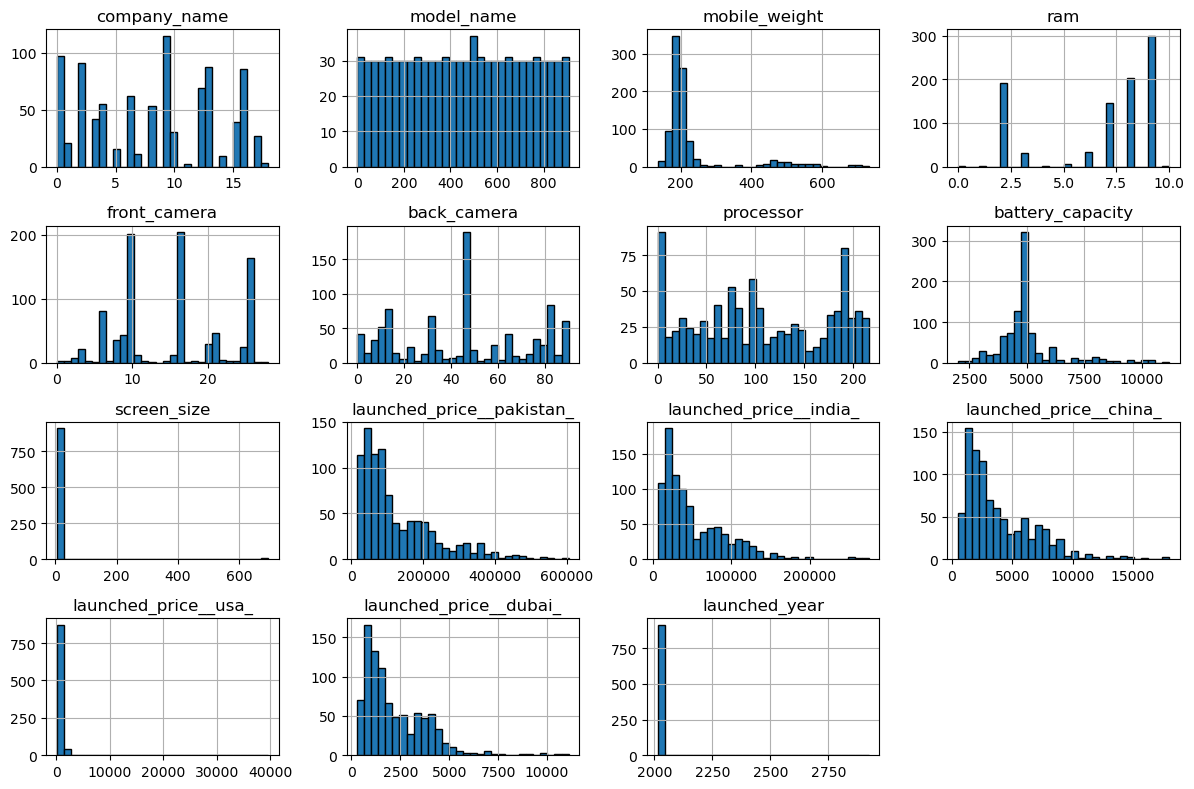

In [34]:
import matplotlib.pyplot as plt

df_cleaned.hist(figsize=(12, 8), bins=30, edgecolor='black')
# Adjust layout to add gap
plt.tight_layout()  
plt.show()

### Correlation Analysis

In [38]:
df_cleaned.corr()

,company_name,model_name,mobile_weight,ram,front_camera,back_camera,processor,battery_capacity,screen_size,launched_price__pakistan_,launched_price__india_,launched_price__china_,launched_price__usa_,launched_price__dubai_,launched_year
company_name,1.000000,-0.145583,-0.076015,-0.078611,0.008393,0.222802,0.245690,0.079848,-0.028035,-0.214770,-0.278038,-0.251957,-0.083391,-0.236893,0.037683
model_name,-0.145583,1.000000,0.086811,0.060123,-0.086212,-0.192721,-0.283642,-0.089777,0.035880,0.163346,0.196384,0.177456,0.076447,0.126864,-0.045162
mobile_weight,-0.076015,0.086811,1.000000,-0.032209,0.215402,-0.066633,-0.000925,0.847969,0.009852,0.097962,0.138304,0.134031,0.103435,0.096677,-0.006211
ram,-0.078611,0.060123,-0.032209,1.000000,0.080454,-0.030860,-0.108818,-0.067254,-0.029583,-0.292999,-0.319532,-0.319052,-0.103461,-0.361561,0.023192
front_camera,0.008393,-0.086212,0.215402,0.080454,1.000000,-0.077609,0.112556,0.241731,0.017115,-0.434471,-0.340381,-0.358925,-0.064014,-0.360248,-0.044825
back_camera,0.222802,-0.192721,-0.066633,-0.030860,-0.077609,1.000000,0.084907,0.025863,0.001720,-0.154553,-0.154294,-0.169191,0.002346,-0.147006,0.031998
processor,0.245690,-0.283642,-0.000925,-0.108818,0.112556,0.084907,1.000000,0.084065,0.084417,-0.125587,-0.173815,-0.146734,0.013300,-0.095547,-0.033767
battery_capacity,0.079848,-0.089777,0.847969,-0.067254,0.241731,0.025863,0.084065,1.000000,-0.033806,-0.043001,-0.009913,-0.025607,0.063258,-0.039546,0.016436
screen_size,-0.028035,0.035880,0.009852,-0.029583,0.017115,0.001720,0.084417,-0.033806,1.000000,0.061393,0.044563,0.070012,0.024930,0.076544,0.000632
launched_price__pakistan_,-0.214770,0.163346,0.097962,-0.292999,-0.434471,-0.154553,-0.125587,-0.043001,0.061393,1.000000,0.903474,0.902329,0.253470,0.897837,0.094326


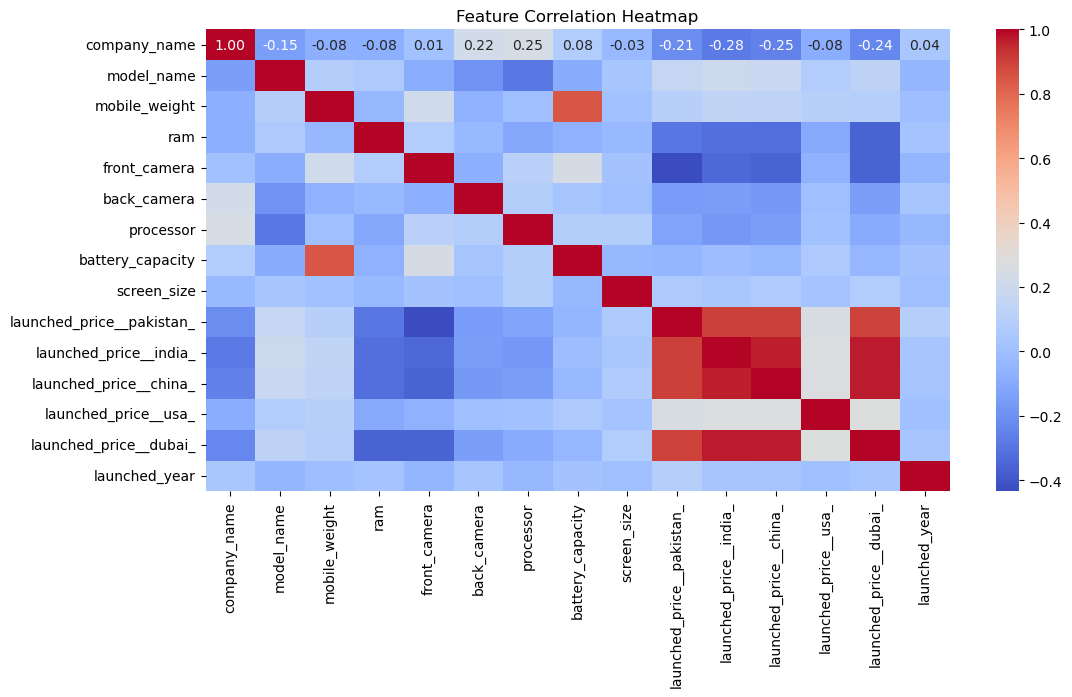

In [31]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

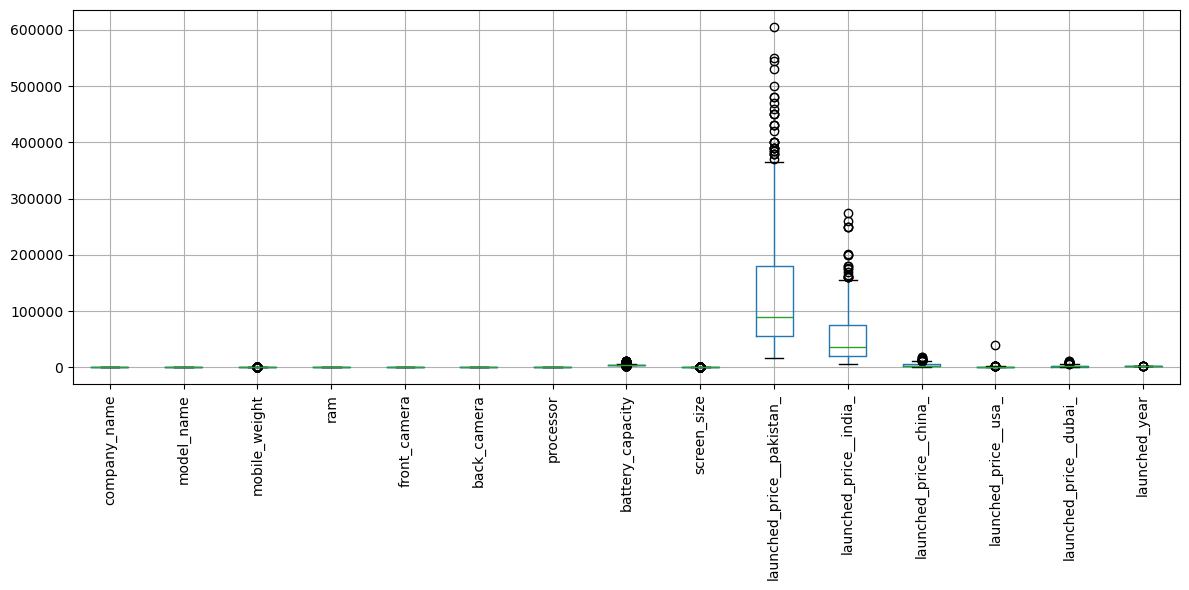

In [35]:
#Checking Outliers
plt.figure(figsize=(12, 6))
df_cleaned.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

### Mobile Brand Distribution

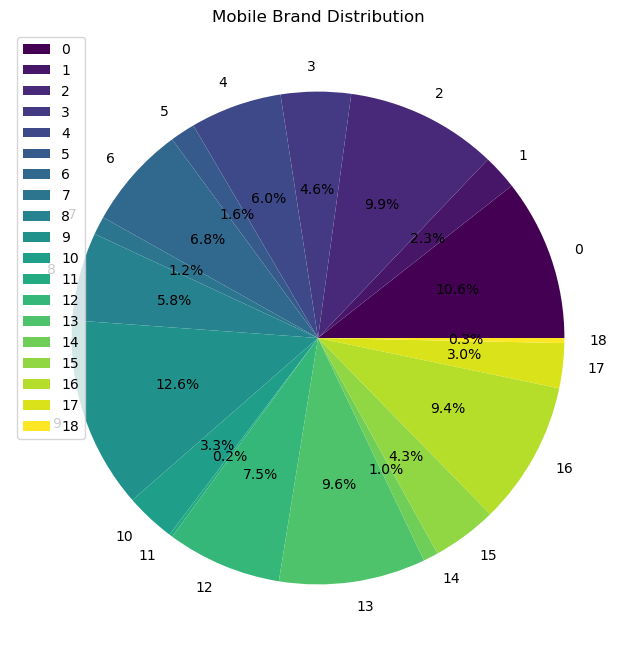

In [40]:
import matplotlib.pyplot as plt

brand_counts = df_cleaned.groupby('company_name').size()
# Plot Pie Chart
plt.figure(figsize=(8, 8))
brand_counts.plot.pie(autopct='%1.1f%%', cmap='viridis', legend=True)

plt.title("Mobile Brand Distribution")
plt.show()

In [46]:
df_cleaned.head(3)

,company_name,model_name,mobile_weight,ram,front_camera,back_camera,processor,battery_capacity,screen_size,launched_price__pakistan_,launched_price__india_,launched_price__china_,launched_price__usa_,launched_price__dubai_,launched_year
0,0,884,174.0,8,6,32,7,3600.0,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,0,885,174.0,8,6,32,7,3600.0,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,0,886,174.0,8,6,32,7,3600.0,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024


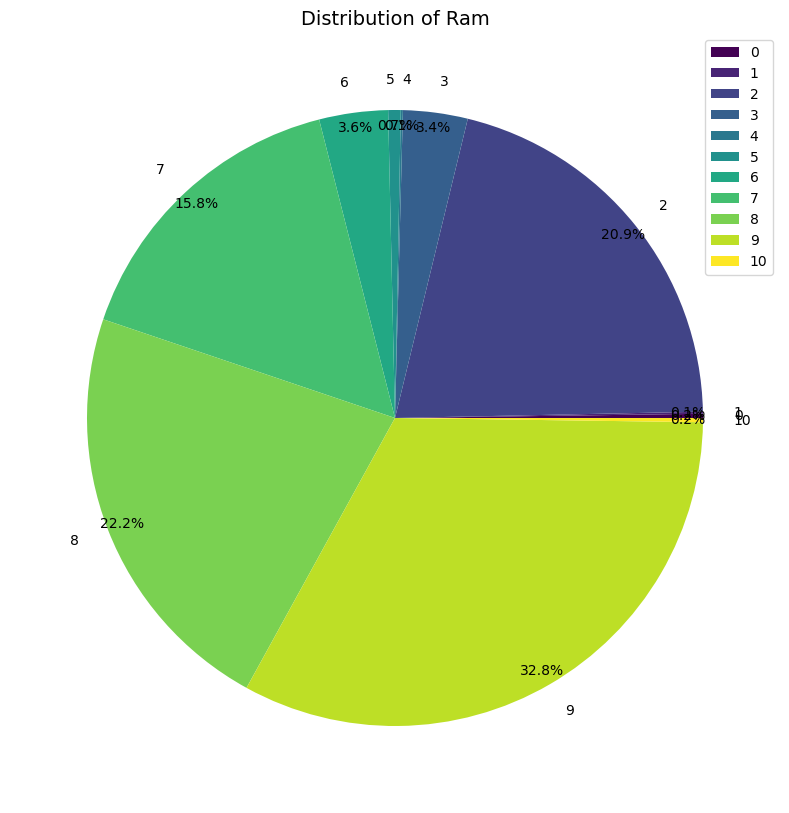

In [56]:
import matplotlib.pyplot as plt

column_name = 'ram'  
column_counts = df_cleaned.groupby('ram').size()
fig, ax = plt.subplots(figsize=(8, 8))
column_counts.plot.pie(autopct='%1.1f%%', cmap='viridis', legend=True, ax=ax, pctdistance=0.95)
ax.set_title(f"Distribution of {column_name.capitalize()}", fontsize=14)
plt.subplots_adjust(left=0.3, right=0.7, top=0.9, bottom=0.1)  
plt.tight_layout()
plt.show()

### Back Camera Distribution

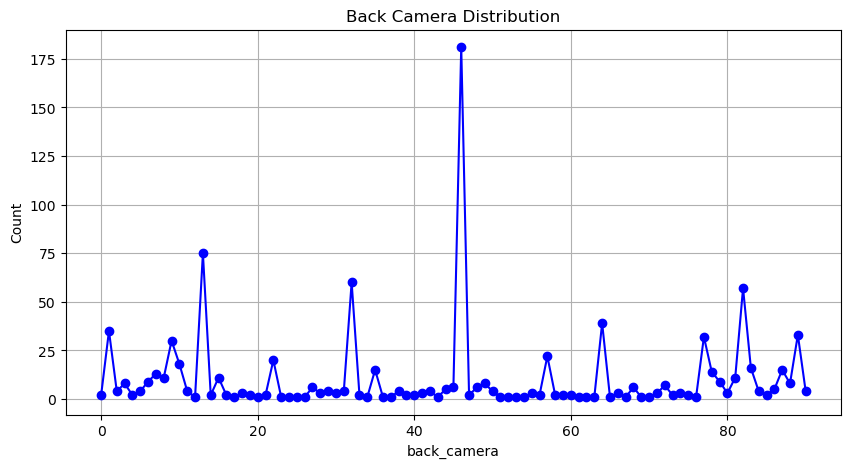

In [61]:
import matplotlib.pyplot as plt
column_counts = df_cleaned.groupby('back_camera').size()
plt.figure(figsize=(10, 5))
plt.plot(column_counts.index, column_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel("back_camera")
plt.ylabel("Count")
plt.title("Back Camera Distribution")
plt.grid(True)
plt.show()

### Launched Price Distribution with Country

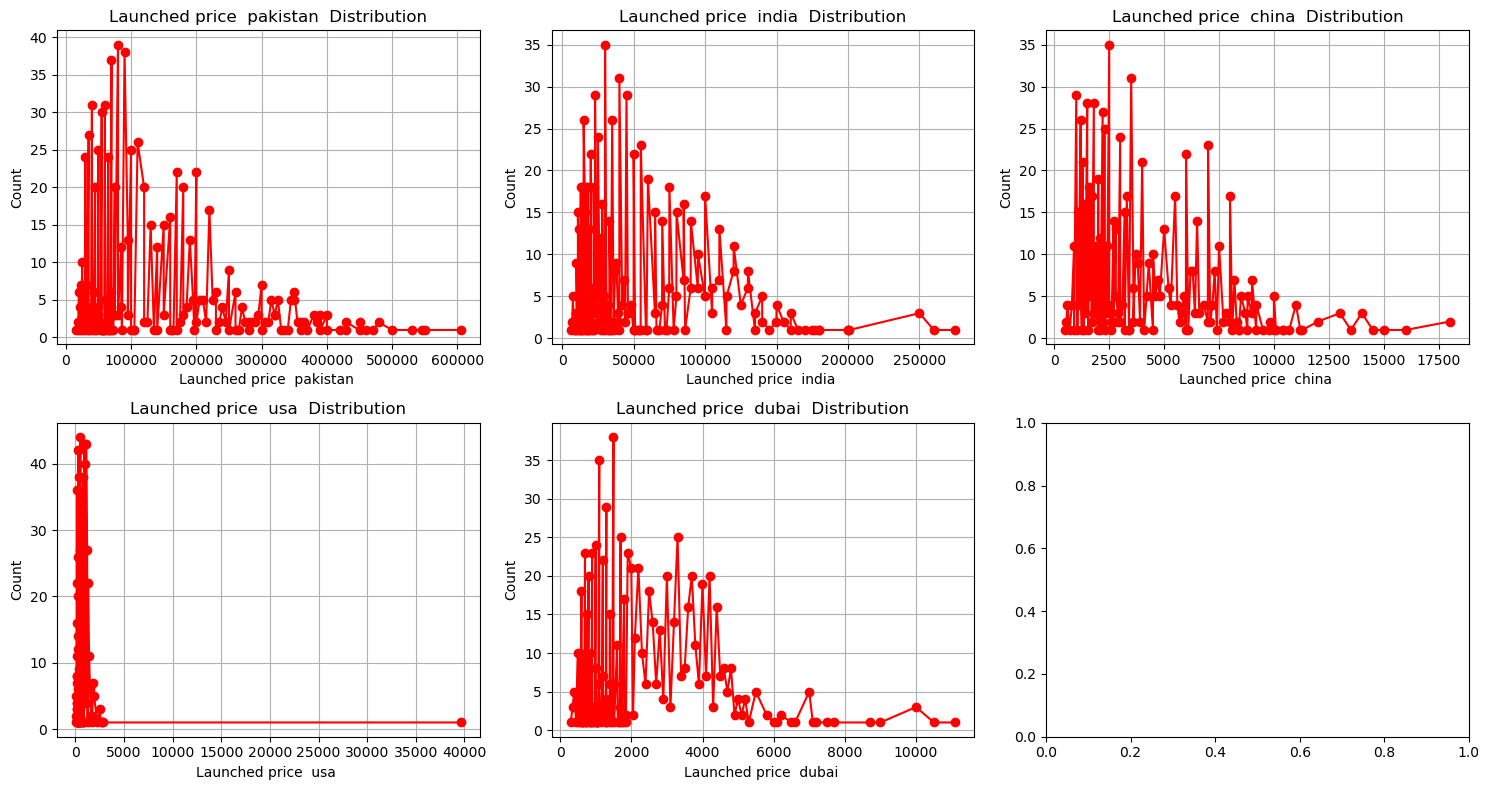

In [69]:
price_columns = [col for col in df_cleaned.columns if 'launched_price' in col.lower()]
num_cols = len(price_columns)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Flatten for easier indexing

for i, price_col in enumerate(price_columns):
    column_counts = df_cleaned.groupby(price_col).size()
    
    axes[i].plot(column_counts.index, column_counts.values, marker='o', linestyle='-', color='r')
    axes[i].set_xlabel(price_col.replace("_", " ").capitalize())
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"{price_col.replace('_', ' ').capitalize()} Distribution")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## Comparisons

### Brand-wise Price Comparison

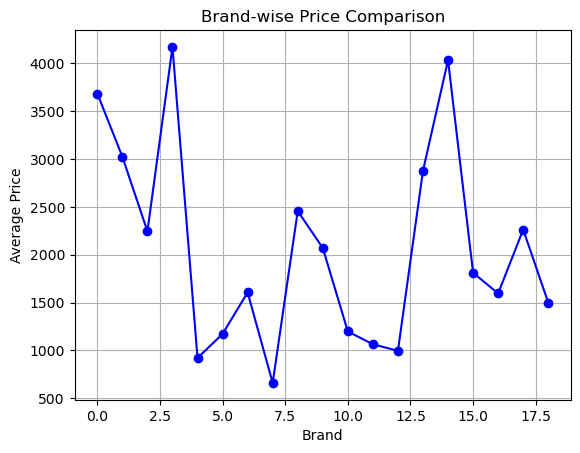

In [74]:
df_cleaned.groupby('company_name')['launched_price__dubai_'].mean().plot(kind='line', marker='o', color='b')
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Brand-wise Price Comparison")
plt.grid(True)
plt.show()


### Brand-wise Battery Capacity Comparison

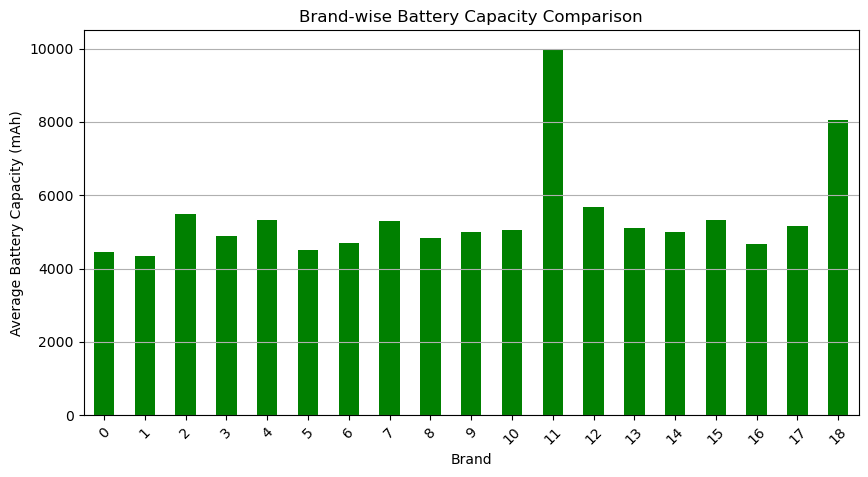

In [75]:
df_cleaned.groupby('company_name')['battery_capacity'].mean().plot(kind='bar', color='g', figsize=(10, 5))
plt.xlabel("Brand")
plt.ylabel("Average Battery Capacity (mAh)")
plt.title("Brand-wise Battery Capacity Comparison")
plt.xticks(rotation=45)
plt.show()

### Brand-wise RAM Capacity Comparison

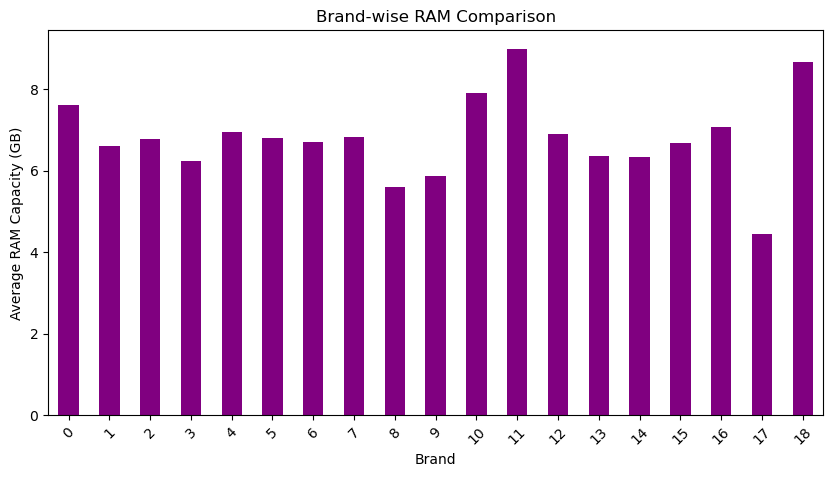

In [93]:
df_cleaned.groupby('company_name')['ram'].mean().plot(kind='bar', color='purple', figsize=(10, 5))
plt.xlabel("Brand")
plt.ylabel("Average RAM Capacity (GB)")
plt.title("Brand-wise RAM Comparison")
plt.xticks(rotation=45)
plt.show()

### Brand-wise Other Quality Comparison 

C:\Users\Divya\AppData\Local\Temp\ipykernel_6552\2626157265.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(brand_avg.index, rotation=45)
C:\Users\Divya\AppData\Local\Temp\ipykernel_6552\2626157265.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(brand_avg.index, rotation=45)
C:\Users\Divya\AppData\Local\Temp\ipykernel_6552\2626157265.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(brand_avg.index, rotation=45)
C:\Users\Divya\AppData\Local\Temp\ipykernel_6552\2626157265.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(brand_avg.index, rotation=

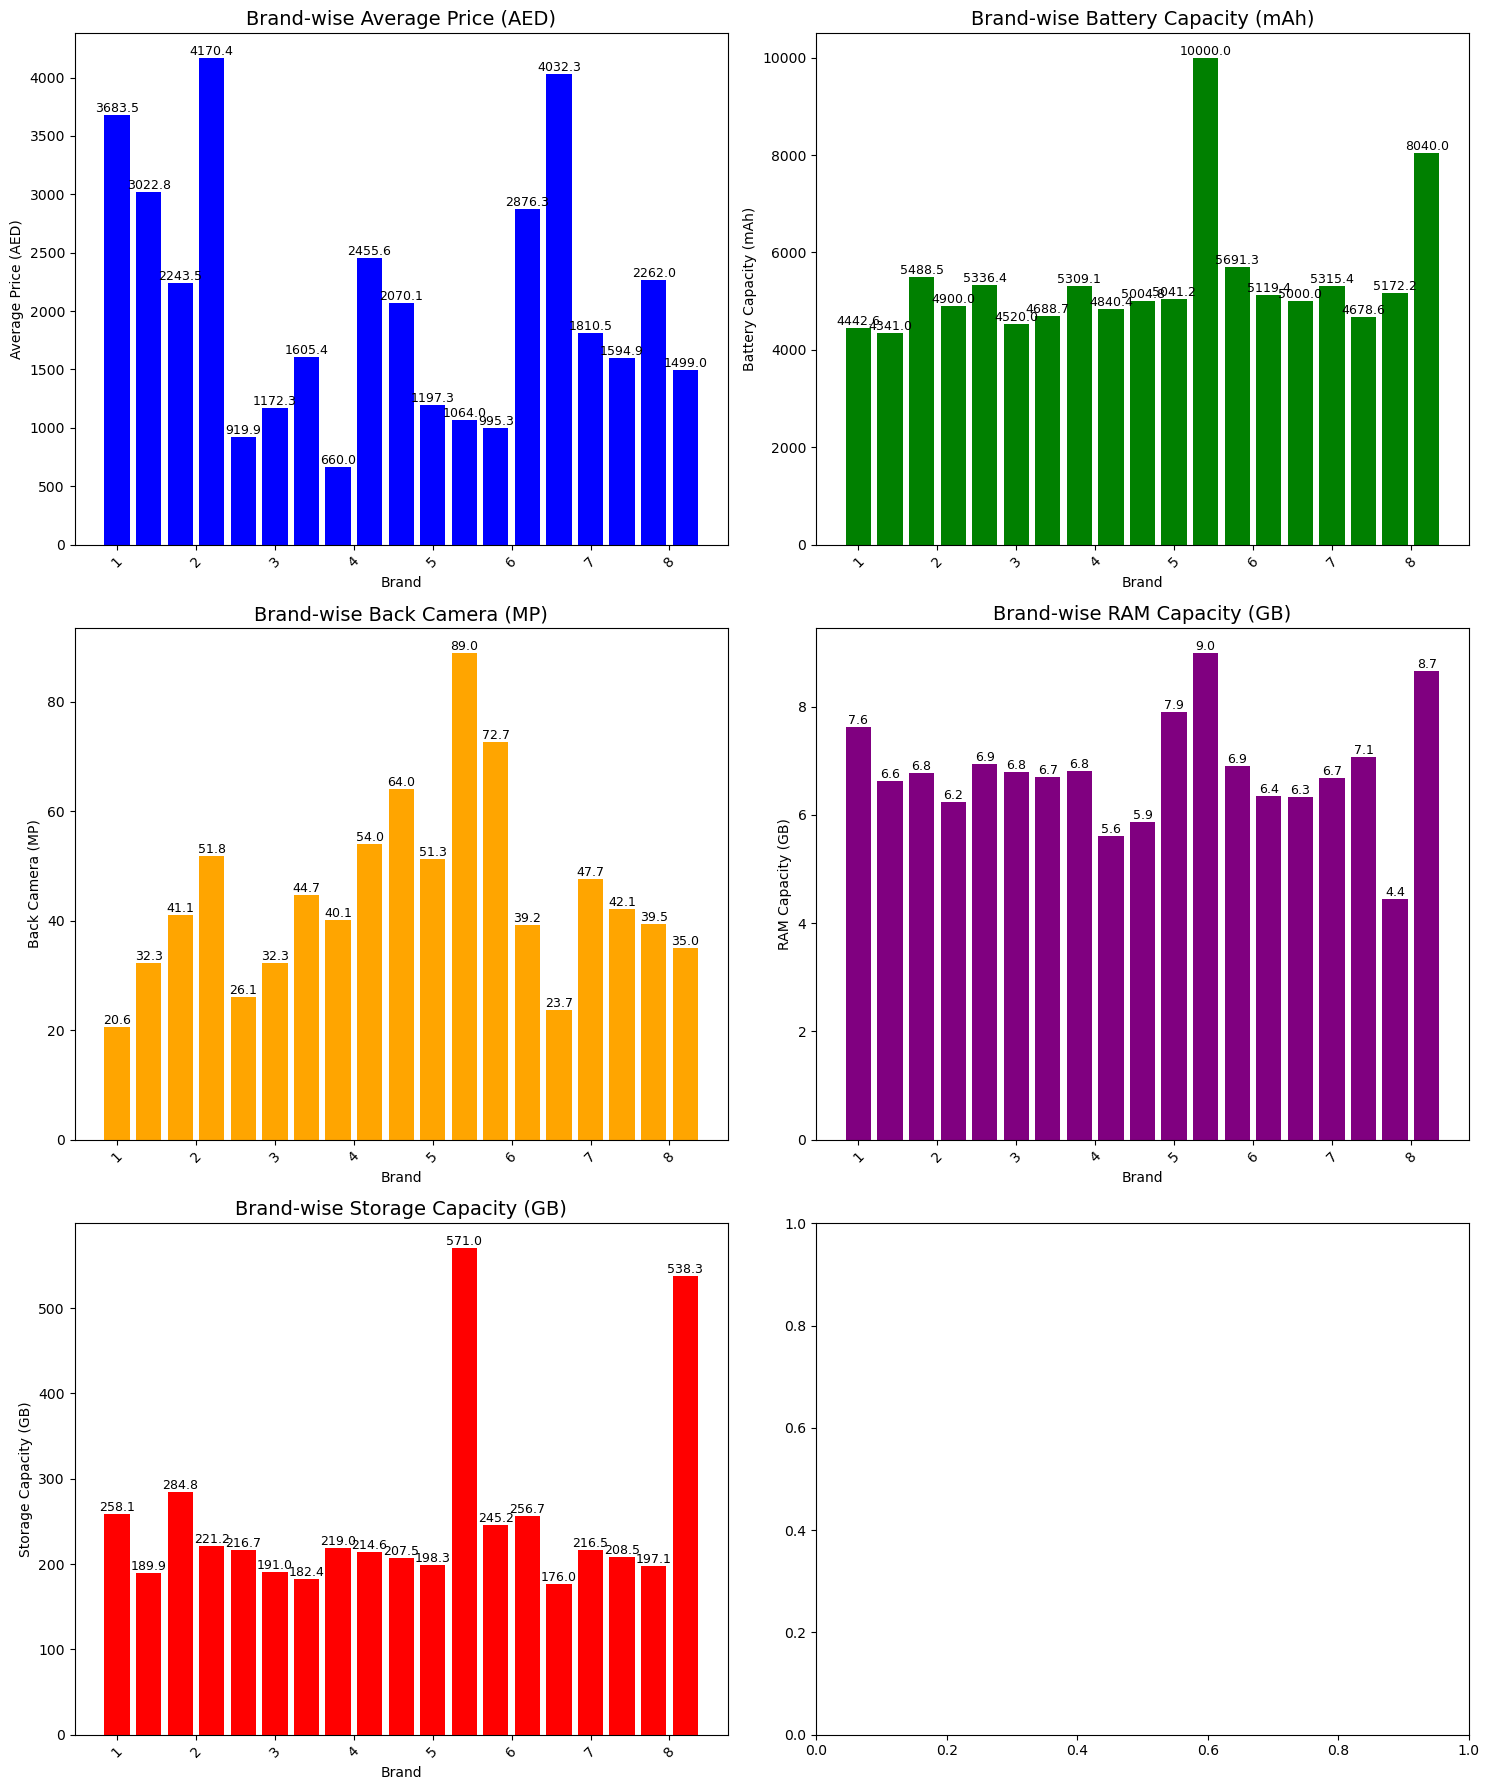

In [91]:
import matplotlib.pyplot as plt

# Define features to compare
features = ['launched_price__dubai_', 'battery_capacity', 'back_camera', 'ram', 'mobile_weight']
titles = ['Average Price (AED)', 'Battery Capacity (mAh)', 'Back Camera (MP)', 'RAM Capacity (GB)', 'Storage Capacity (GB)']
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten() 

for i, feature in enumerate(features):
    brand_avg = df_cleaned.groupby('company_name')[feature].mean()
    bars = axes[i].bar(brand_avg.index, brand_avg.values, color=colors[i])

    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                     f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

    # Formatting each subplot
    axes[i].set_title(f"Brand-wise {titles[i]}", fontsize=14)
    axes[i].set_xlabel("Brand")
    axes[i].set_ylabel(titles[i])
    axes[i].set_xticklabels(brand_avg.index, rotation=45)
    
plt.tight_layout()
plt.show()

# Train a Model to Predict Best Mobiles

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
features = ['ram', 'battery_capacity', 'mobile_weight', 'back_camera', 'front_camera']
X = df_cleaned[features]
y = df_cleaned['company_name']  # Predicting brand based on features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.76


# Recommend a phone based on user preferences

In [99]:
# Function to recommend a phone based on user preferences
def recommend_mobile(ram, battery, weight):
    filtered_df = df_cleaned[
        (df_cleaned['ram'] >= ram) & 
        (df_cleaned['battery_capacity'] >= battery) & 
        (df_cleaned['mobile_weight'] >= weight)
    ]
    
    if not filtered_df.empty:
        return filtered_df[['company_name', 'model_name', 'launched_price__dubai_']].sort_values(by='launched_price__dubai_')
    else:
        return "No matching phones found."

recommend_mobile(ram=8, battery=4000, weight=128)

,company_name,model_name,launched_price__dubai_
495,12,68,580.0
789,4,249,599.0
493,12,69,600.0
488,12,74,600.0
485,12,397,600.0
...,...,...,...
94,0,826,5299.0
95,0,823,5799.0
96,0,825,6099.0
634,3,353,8999.0


In [103]:
def recommend_mobile(ram, battery, weight):
    filtered_df = df_cleaned[
        (df_cleaned['ram'] >= ram) & 
        (df_cleaned['battery_capacity'] >= battery) & 
        (df_cleaned['mobile_weight'] >= weight)
    ]
    
    if not filtered_df.empty:
        return filtered_df[['company_name', 'model_name', 'launched_price__india_']].sort_values(by='launched_price__india_')
    else:
        return "No matching phones found."

recommend_mobile(ram=8, battery=4000, weight=128)

,company_name,model_name,launched_price__india_
779,4,255,11499.0
789,4,249,11999.0
771,4,264,12499.0
790,4,250,12499.0
763,4,269,12499.0
...,...,...,...
94,0,826,159900.0
95,0,823,179900.0
96,0,825,199900.0
634,3,353,199999.0
